In [17]:
from fbprophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

In [18]:
df = pd.read_csv('AirPassengers.csv')
df.head(5)
df = df.rename(columns={'#Passengers': 'y', 'Month':'ds'})

In [19]:
df.head(5)

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [21]:
df.tail(5)

,ds,y
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [22]:
df

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [23]:
df['y_orig'] = df['y'] # to save a copy of the original data..you'll see why shortly. 
df['y'] = np.log(df['y'])

In [24]:
df

,ds,y,y_orig
0,1949-01,4.718499,112
1,1949-02,4.770685,118
2,1949-03,4.882802,132
3,1949-04,4.859812,129
4,1949-05,4.795791,121
5,1949-06,4.905275,135
6,1949-07,4.997212,148
7,1949-08,4.997212,148
8,1949-09,4.912655,136
9,1949-10,4.779123,119


In [25]:
model = Prophet() #instantiate Prophet
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
df.tail(5)

,ds,y,y_orig
139,1960-08,6.406880,606
140,1960-09,6.230481,508
141,1960-10,6.133398,461
142,1960-11,5.966147,390
143,1960-12,6.068426,432


In [26]:
'''     'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''

df.tail(5)
#future_data = model.make_future_dataframe(periods=6, freq = 'H')
future_data = model.make_future_dataframe(periods=10, freq = '15D')
future_data.tail(15)

,ds
139,1960-08-01
140,1960-09-01
141,1960-10-01
142,1960-11-01
143,1960-12-01
144,1960-12-02
145,1960-12-03
146,1960-12-04
147,1960-12-05
148,1960-12-06


In [29]:
forecast_data = model.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
139,1960-08-01,6.375428,6.331172,6.423025
140,1960-09-01,6.233689,6.184633,6.274355
141,1960-10-01,6.116969,6.070666,6.160384
142,1960-11-01,5.982408,5.935872,6.027425
143,1960-12-01,6.097291,6.049668,6.139355
144,1960-12-02,6.091390,6.046093,6.135694
145,1960-12-03,6.087035,6.043967,6.131870
146,1960-12-04,6.084318,6.035409,6.128851
147,1960-12-05,6.083281,6.040776,6.128410
148,1960-12-06,6.083916,6.039830,6.129512


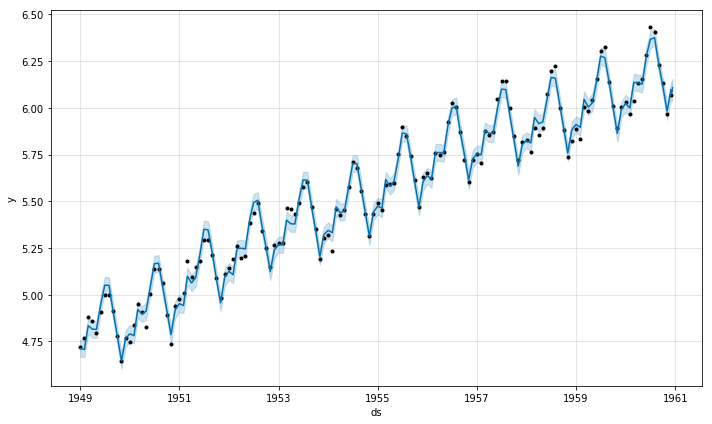

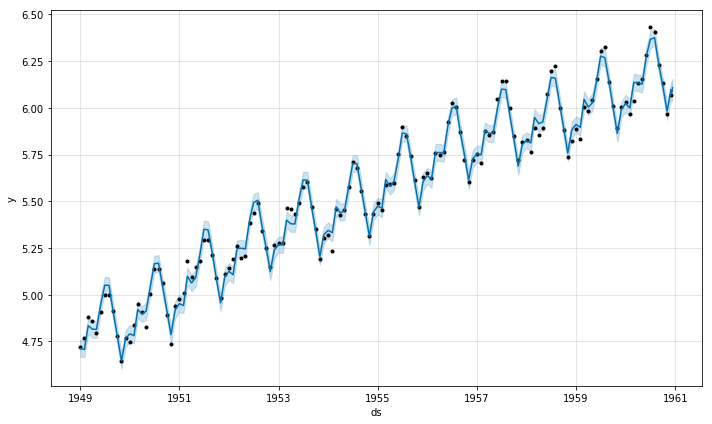

In [30]:
model.plot(forecast_data)

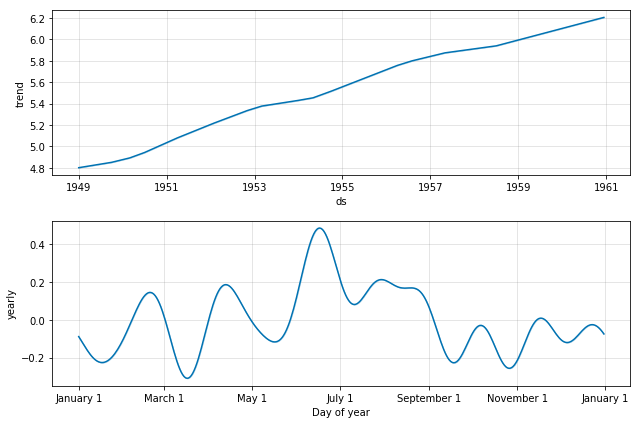

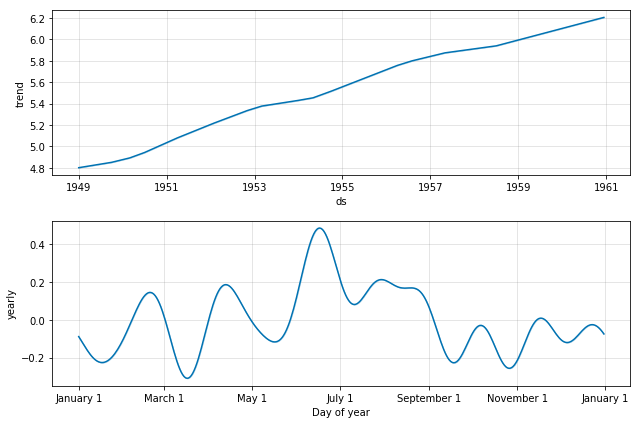

In [31]:
model.plot_components(forecast_data)

In [32]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

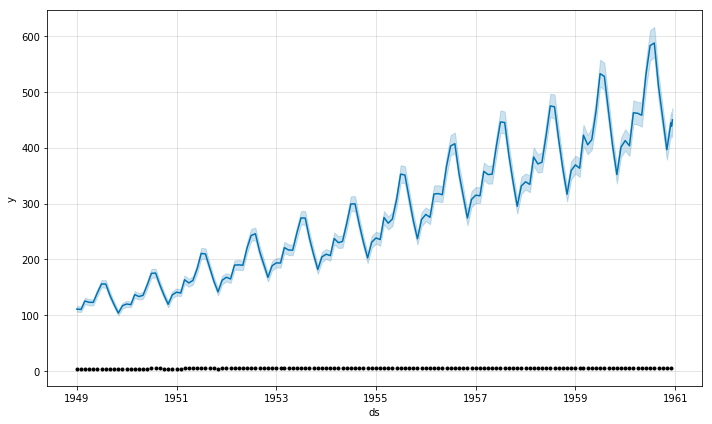

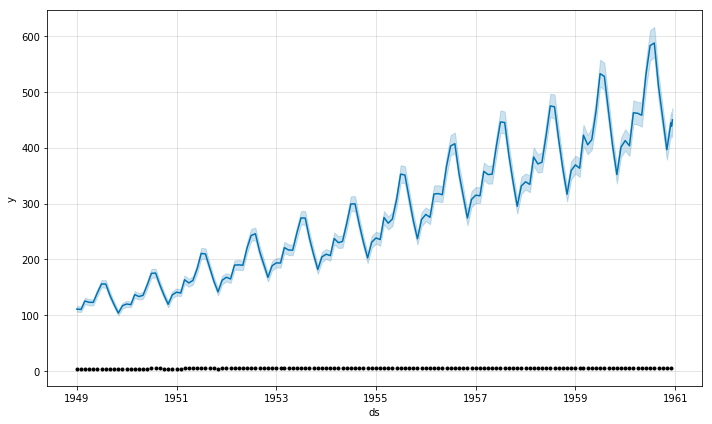

In [33]:
model.plot(forecast_data_orig)

In [34]:
df['y_log']=df['y'] #copy the log-transformed data to another column
df['y']=df['y_orig']

In [35]:
final_df = pd.DataFrame(forecast_data_orig)

In [36]:
import plotly.graph_objs as go
import plotly.offline as py

In [37]:
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], image_width=400, image_height=400)
#py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], filename = 'templates/' +'filename.html', auto_open=False)

'temp-plot.html'